## 1. Importing Libraries and Packages 

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Viewing Data Set 

In [2]:
training = pd.read_csv("../input/titanic/train.csv")
testing = pd.read_csv("../input/titanic/test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 3. Dealing with NaN Values (Imputation) 

In [6]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Density'>

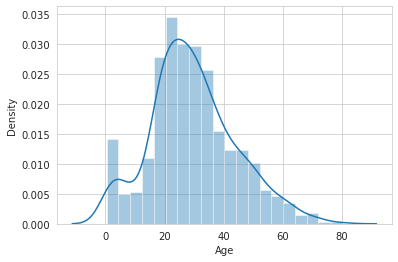

In [8]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [9]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)


Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## 4. Plotting and Visualizing Data 

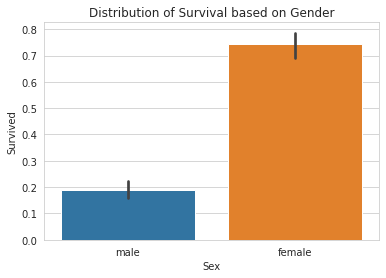

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [10]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

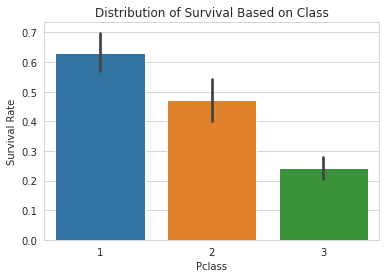

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [11]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

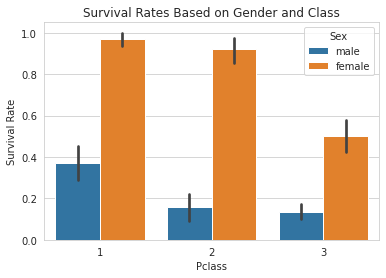

In [12]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

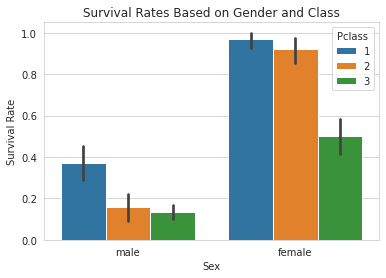

In [13]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

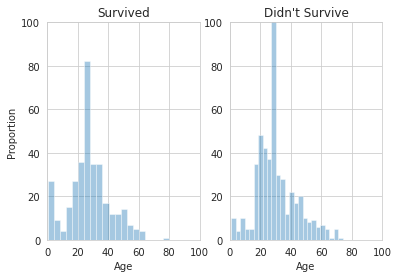

In [14]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

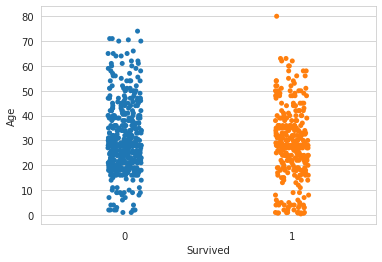

In [15]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

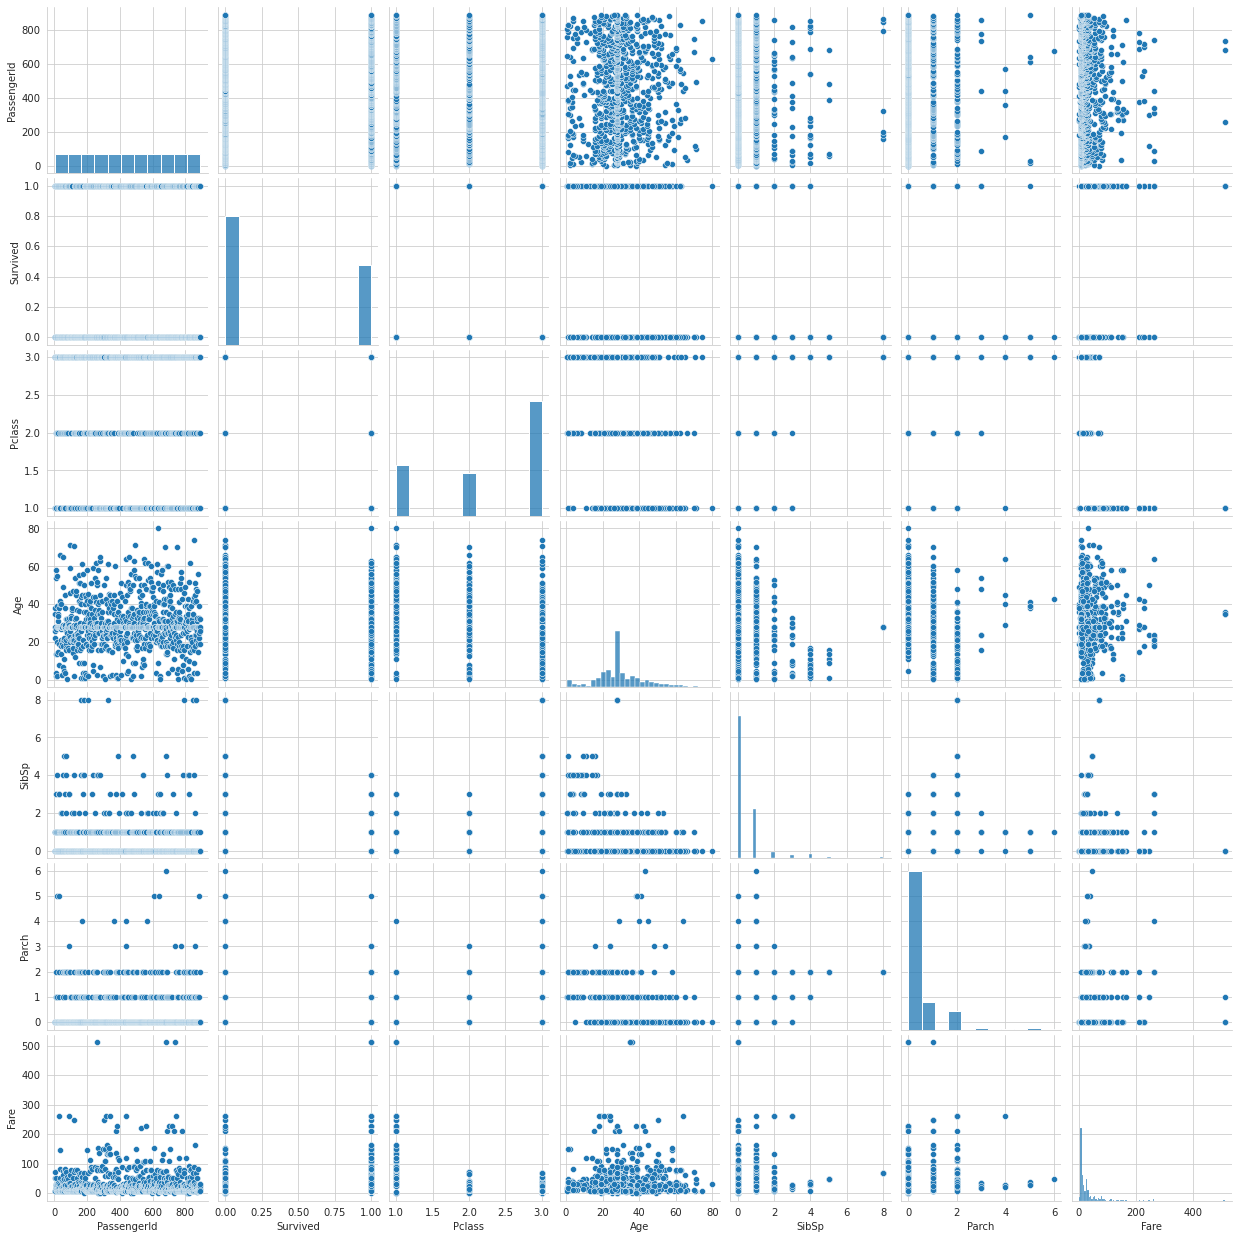

In [16]:
sns.pairplot(training)

# 5. Feature Engineering

In [17]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.0750,S
45,46,0,3,"Rogers, Mr. William John",male,28.0,0,0,8.0500,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,10.4625,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,29.1250,Q
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,15.7417,C


In [18]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,7.7250,Q
116,1008,3,"Thomas, Mr. John",male,27.0,0,0,6.4375,C
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,60.0000,S
103,995,3,"Johansson Palmquist, Mr. Oskar Leander",male,26.0,0,0,7.7750,S


In [19]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [20]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
296,1188,2,"Laroche, Miss. Louise",1,1.0,1,2,41.5792,1
42,934,3,"Goldsmith, Mr. Nathan",0,41.0,0,0,7.8500,0
402,1294,1,"Gibson, Miss. Dorothy Winifred",1,22.0,0,1,59.4000,1
350,1242,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",1,45.0,0,1,63.3583,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,262.3750,1
400,1292,1,"Bonnell, Miss. Caroline",1,30.0,0,0,164.8667,0
242,1134,1,"Spedden, Mr. Frederic Oakley",0,45.0,1,1,134.5000,1
348,1240,2,"Giles, Mr. Ralph",0,24.0,0,0,13.5000,0
341,1233,3,"Lundstrom, Mr. Thure Edvin",0,32.0,0,0,7.5792,0
136,1028,3,"Zakarian, Mr. Mapriededer",0,26.5,0,0,7.2250,1


In [21]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [22]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [23]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [24]:
print(set(training["Title"]))

{0, 1, 2, 3, 4}


In [25]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
114,115,0,3,"Attalah, Miss. Malake",1,17.0,0,0,14.4583,1,1,1,0
411,412,0,3,"Hart, Mr. Henry",0,28.0,0,0,6.8583,2,1,1,1
747,748,1,2,"Sinkkonen, Miss. Anna",1,30.0,0,0,13.0000,0,1,1,0
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,13.0000,0,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,0,1,1,1


## 6. Model Fitting and Predicting

In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.metrics import make_scorer, accuracy_score 

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [30]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [31]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7262569832402235


In [32]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7262569832402235


In [33]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8100558659217877


In [34]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8100558659217877


In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


In [36]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


In [37]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.776536312849162


## 7. Evaluating Model Performances

In [38]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

NameError: name 'acc_linsvc' is not defined

## 8. Tuning Parameters with GridSearchCV 

In [39]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=6)

In [40]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=6)

## 9. Submission 

In [41]:
submission_predictions =rf_clf.predict(X_test)

In [42]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
